In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
plotmfc = pd.read_csv("combined_2_version.csv")

In [7]:
plotmfc.head(20)

,Type of Material,Anode,Size of Anode,Surface Area of Anode cm2,Inoculum Source/,Power Density mw/m2,Title,DOI,Year,duplicated
0,Carbon-based,Carbon Cloth,NaN,NaN,Innoculum Source,28.000,Full-loop operation and cathodic acidification...,10.1016/j.biortech.2011.02.098,2011,False
1,Carbon-based,Graphite Rod and Carbon Cloth,NaN,NaN,Domestic wastewater,229.000,Power recovery with multi-anode/cathode microb...,10.1016/j.ijhydene.2010.04.136,2010,False
2,Carbon-based,Graphite Rod and Carbon Cloth,NaN,NaN,Domestic wastewater,1200.000,A pilot-scale study on utilizing multi-anode/c...,10.1016/j.ijhydene.2010.08.074,2011,False
3,Carbon-based,Graphite Felt,NaN,NaN,Domestic wastewater,149.000,Electricity generation and microbial community...,10.1016/j.biortech.2012.04.078,2012,False
4,Carbon-based,Graphite Felt,NaN,NaN,Domestic wastewater,3.226,Scalable microbial fuel cell (MFC) stack for c...,10.1016/j.biortech.2011.11.019,2012,False
5,Carbon-based,Graphite Felt,NaN,NaN,Swine wastewater,0.097,Long-term evaluation of a 10-liter serpentine-...,10.1016/j.biortech.2012.07.038,2012,False
6,Carbon-based,Carbon Brush,NaN,NaN,Malt wastewater,4.710,In situ investigation of tubular microbial fue...,10.1016/j.biortech.2013.02.107,2013,False
7,Carbon-based,Carbon Brush,NaN,NaN,Domestic wastewater,14.610,Long-term performance of liter-scale microbial...,10.1021/es400631r,2013,False
8,Carbon-based,Carbon Brush,NaN,NaN,Domestic wastewater,14.500,A horizontal plug flow and stackable pilot mic...,10.1016/j.biortech.2013.12.104,2014,False
9,Carbon-based,Carbon Brush,NaN,NaN,Domestic wastewater,159.000,A 90-liter stackable baffled microbial fuel ce...,10.1016/j.biortech.2015.06.026,2015,False


In [8]:
plotmfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type of Material           93 non-null     object 
 1   Anode                      93 non-null     object 
 2   Size of Anode              41 non-null     object 
 3   Surface Area of Anode cm2  59 non-null     object 
 4   Inoculum Source/           93 non-null     object 
 5   Power Density mw/m2        93 non-null     float64
 6   Title                      93 non-null     object 
 7   DOI                        93 non-null     object 
 8   Year                       93 non-null     int64  
 9   duplicated                 93 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 6.8+ KB


In [9]:
plotmfc['Type of Material'].unique()

array(['Carbon-based', 'Composite', 'Composites', 'Metal / Metal Oxide',
       'Natural Source', 'Modified Polymer'], dtype=object)

In [10]:
plotmfc['Inoculum Source/'].unique()
#we have may duplicates of the same type of inoculum source

array(['Innoculum Source', 'Domestic wastewater', 'Swine wastewater',
       'Malt wastewater', 'Municipal Sewage',
       'Vegetable Oil Industry Wastewater', 'S. putrefaciens CN32',
       'E. coli', 'P. aeruginosa', 'Anaerobic Sludge',
       'S. oneidensis MR-1', 'Wastewater', 'Anaerobic sludge',
       'Anaerobic pre-treated sludge', 'Sludge', 'Native wastewater',
       'S. oneidensis', 'Mixed community',
       'Domestic wastewater - acetate', 'Primary clarifier overflow',
       'Shewanellaoneidensi', 'Preacclimated bacteria from an active MFC',
       'Marine sediments', 'Sediment sludge', 'Pseudomonas',
       'Anaerobic mix sludge', 'Mix sludge', 'Domestic waste',
       'Effluent of MFC', 'Strain Breeding', 'Active Sludge', 'E.Coli',
       'Food Wastewater', 'S.Putrefaciens ', 'S.Oneidensis',
       'Anaerobic Granular Sludge', '4%LL', 'S.Ioihica',
       'Domestic Sewage'], dtype=object)

In [11]:
#domestic wastwater and domestic waste
plotmfc['Inoculum Source/'].replace('Domestic wastewater','Domestic waste',inplace=True)

In [12]:
plotmfc['Inoculum Source/'].unique()

array(['Innoculum Source', 'Domestic waste', 'Swine wastewater',
       'Malt wastewater', 'Municipal Sewage',
       'Vegetable Oil Industry Wastewater', 'S. putrefaciens CN32',
       'E. coli', 'P. aeruginosa', 'Anaerobic Sludge',
       'S. oneidensis MR-1', 'Wastewater', 'Anaerobic sludge',
       'Anaerobic pre-treated sludge', 'Sludge', 'Native wastewater',
       'S. oneidensis', 'Mixed community',
       'Domestic wastewater - acetate', 'Primary clarifier overflow',
       'Shewanellaoneidensi', 'Preacclimated bacteria from an active MFC',
       'Marine sediments', 'Sediment sludge', 'Pseudomonas',
       'Anaerobic mix sludge', 'Mix sludge', 'Effluent of MFC',
       'Strain Breeding', 'Active Sludge', 'E.Coli', 'Food Wastewater',
       'S.Putrefaciens ', 'S.Oneidensis', 'Anaerobic Granular Sludge',
       '4%LL', 'S.Ioihica', 'Domestic Sewage'], dtype=object)

In [13]:
plotmfc.isnull().sum()

Type of Material              0
Anode                         0
Size of Anode                52
Surface Area of Anode cm2    34
Inoculum Source/              0
Power Density mw/m2           0
Title                         0
DOI                           0
Year                          0
duplicated                    0
dtype: int64

<AxesSubplot:xlabel='Type of Material', ylabel='count'>

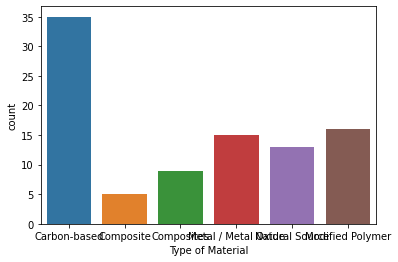

In [14]:
sns.countplot(x='Type of Material', data=plotmfc)

<AxesSubplot:xlabel='Surface Area of Anode cm2', ylabel='Power Density mw/m2'>

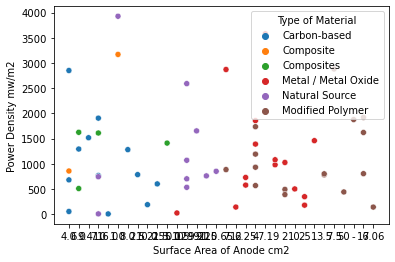

In [15]:
sns.scatterplot(x='Surface Area of Anode cm2', y='Power Density mw/m2',data=plotmfc,hue='Type of Material')